In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Importar Biblioteca

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, classification_report, f1_score
from sklearn.base import clone
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

from tqdm import tqdm


#Importar Dados

In [ ]:
dataset_path = '/content/drive/My Drive/dataset_mc853/train_dataset.csv'
train_data = pd.read_csv(dataset_path, index_col=0)

dataset_path = '/content/drive/My Drive/dataset_mc853/test_dataset.csv'
test_data = pd.read_csv(dataset_path, index_col=0)

In [ ]:
train_data.head(0)

,NU_IDADE_N,CS_SEXO,CLI_FEBRE,CLI_MIALGI,CLI_CEFALE,CLI_PROST,CLI_CONGES,CLI_VOMITO,CLI_DIARRE,CLI_ICTERI,CLI_RENAL,CLI_RESPIR,CLI_CARDIA,CLI_MENING,EVOLUCAO,regiao_Centro_Oeste,regiao_Norte,regiao_Sudeste,regiao_Sul,regiao_Nordeste


In [ ]:
#count values of each label
train_data['EVOLUCAO'].value_counts()

,count
EVOLUCAO,
0,758
1,237


In [ ]:
train_data.columns

Index(['NU_IDADE_N', 'CS_SEXO', 'CLI_FEBRE', 'CLI_MIALGI', 'CLI_CEFALE',
       'CLI_PROST', 'CLI_CONGES', 'CLI_VOMITO', 'CLI_DIARRE', 'CLI_ICTERI',
       'CLI_RENAL', 'CLI_RESPIR', 'CLI_CARDIA', 'CLI_MENING', 'EVOLUCAO',
       'regiao_Centro_Oeste', 'regiao_Norte', 'regiao_Sudeste', 'regiao_Sul',
       'regiao_Nordeste'],
      dtype='object')

# Matriz de correlação entre os dados

In [ ]:
train_data.corr()

,NU_IDADE_N,CS_SEXO,CLI_FEBRE,CLI_MIALGI,CLI_CEFALE,CLI_PROST,CLI_CONGES,CLI_VOMITO,CLI_DIARRE,CLI_ICTERI,CLI_RENAL,CLI_RESPIR,CLI_CARDIA,CLI_MENING,EVOLUCAO,regiao_Centro_Oeste,regiao_Norte,regiao_Sudeste,regiao_Sul,regiao_Nordeste
NU_IDADE_N,1.000000,0.039211,-0.198059,-0.004292,-0.086345,0.054123,-0.039658,-0.058139,-0.022911,0.133373,0.220126,0.078937,0.078724,-0.009067,0.215747,0.016186,-0.158563,NaN,0.159003,-0.052576
CS_SEXO,0.039211,1.000000,0.054487,-0.017470,-0.051104,0.016092,0.040178,-0.065691,0.016072,0.138833,0.095116,0.035859,0.050509,0.055976,0.093487,-0.010789,-0.043350,NaN,0.019789,0.019100
CLI_FEBRE,-0.198059,0.054487,1.000000,0.181334,0.237210,0.060520,0.062552,0.135759,0.072976,-0.004592,-0.045774,0.013051,-0.009850,-0.034198,0.020934,0.077631,0.034532,NaN,-0.112517,0.066741
CLI_MIALGI,-0.004292,-0.017470,0.181334,1.000000,0.307380,0.202702,0.065232,0.087509,0.062052,-0.009379,0.035273,0.049691,0.041351,0.001206,0.075712,-0.011248,-0.057078,NaN,0.050356,-0.003915
CLI_CEFALE,-0.086345,-0.051104,0.237210,0.307380,1.000000,0.126719,0.144539,0.185609,0.142358,-0.099093,-0.057319,0.004349,0.051597,0.068548,-0.019524,0.019665,0.062431,NaN,-0.051627,-0.002746
CLI_PROST,0.054123,0.016092,0.060520,0.202702,0.126719,1.000000,0.098348,0.101624,0.165035,0.144539,0.186024,0.183655,0.116229,0.046677,0.111211,0.088761,-0.051448,NaN,0.117539,-0.127463
CLI_CONGES,-0.039658,0.040178,0.062552,0.065232,0.144539,0.098348,1.000000,0.068877,0.084475,0.029468,0.066712,0.078920,0.081416,0.101500,0.004018,0.044219,0.051216,NaN,-0.019575,-0.040069
CLI_VOMITO,-0.058139,-0.065691,0.135759,0.087509,0.185609,0.101624,0.068877,1.000000,0.215250,0.133559,0.011736,0.045368,0.028206,0.014948,0.099277,0.021327,0.001148,NaN,-0.089619,0.092729
CLI_DIARRE,-0.022911,0.016072,0.072976,0.062052,0.142358,0.165035,0.084475,0.215250,1.000000,0.067238,0.088774,0.112115,0.049255,0.039913,0.092312,-0.017281,0.011090,NaN,0.041522,-0.049859
CLI_ICTERI,0.133373,0.138833,-0.004592,-0.009379,-0.099093,0.144539,0.029468,0.133559,0.067238,1.000000,0.237799,0.130162,0.083934,-0.004444,0.290184,0.004728,0.035498,NaN,-0.093635,0.074743


In [ ]:
corr_vector_train = train_data.corr()["EVOLUCAO"]
corr_vector_train.drop(["EVOLUCAO", "regiao_Sudeste"])

,EVOLUCAO
NU_IDADE_N,0.215747
CS_SEXO,0.093487
CLI_FEBRE,0.020934
CLI_MIALGI,0.075712
CLI_CEFALE,-0.019524
CLI_PROST,0.111211
CLI_CONGES,0.004018
CLI_VOMITO,0.099277
CLI_DIARRE,0.092312
CLI_ICTERI,0.290184


# Normalização dos Dados

In [ ]:
# (Única coluna ainda não normalizada é a de idade)
# Normalizando dados de treinamento
train_data["NU_IDADE_N"] = (train_data["NU_IDADE_N"] - train_data["NU_IDADE_N"].min()) / (train_data["NU_IDADE_N"].max() - train_data["NU_IDADE_N"].min())
train_data.head()

# Normalizando dados de teste
test_data["NU_IDADE_N"] = (test_data["NU_IDADE_N"] - test_data["NU_IDADE_N"].min()) / (test_data["NU_IDADE_N"].max() - test_data["NU_IDADE_N"].min())
test_data.head()

,NU_IDADE_N,CS_SEXO,CLI_FEBRE,CLI_MIALGI,CLI_CEFALE,CLI_PROST,CLI_CONGES,CLI_VOMITO,CLI_DIARRE,CLI_ICTERI,CLI_RENAL,CLI_RESPIR,CLI_CARDIA,CLI_MENING,EVOLUCAO,regiao_Centro_Oeste,regiao_Norte,regiao_Sudeste,regiao_Sul,regiao_Nordeste
15,0.304348,1,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0
24,0.054348,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
30,0.467391,1,0,1,1,1,0,0,0,1,1,1,0,0,1,0,0,1,0,0
84,0.597826,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
108,0.695652,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0


# Treinamento

### Definir classificadores e parâmetros

In [ ]:
#definir classificadores
classifiers = {
              'KNN': KNeighborsClassifier(),
              'Random Forest': RandomForestClassifier(),
              'Logistic Regression': LogisticRegression()
              }
#parâmetros para grid search
knn_params = {'n_neighbors': [1, 5, 10],
              'p': [1, 2],
              'weights': ['uniform', 'distance']}

lr_params = {'class_weight': ['balanced',
                              {0: 1, 1: 2},
                              {0: 1, 1: 3}]
             }

rf_params = {
             'n_estimators': [10,100,200],
             'max_depth': [10,50],
             'min_samples_split': [2,10,30]
             }


parameters =  {'KNN': knn_params,
               'Random Forest': rf_params,
               'Logistic Regression': lr_params
               }

### Validação Cruzada

In [ ]:

def balance(X, y):
    """
    Balancear classes para que fiquem na proporção 1.5:1
    """
    #encontrar classe majoritária
    majoritaria = y.value_counts().idxmax()
    minoritaria = y.value_counts().idxmin()

    #checar se as classes obedecem uma proporção de 1.5:1
    prop = y.value_counts()[majoritaria]/y.value_counts()[minoritaria]
    if (prop) <= 1.5:
        return X, y
    else:
        #calcular proporções
        prop_min = y.value_counts()[minoritaria]/y.value_counts()[majoritaria]

        #aumentar minoritaria em 20%
        prop_min = prop_min *1.2

        #aumentar a minoritaria
        oversample = SMOTE(sampling_strategy=prop_min)
        X, y = oversample.fit_resample(X, y)

        #retirar da majoritaria até que a minoritária seja 67% do total
        #com isso a minoritaria sera 40% do total e  a majoritaria sera 60%
        undersample = NearMiss(sampling_strategy=0.67)
        X, y = undersample.fit_resample(X, y)

        return X, y


In [ ]:
clf_score = pd.DataFrame(columns=['model', 'accuracy', 'precision', 'recall'])
models = {
    'KNN': [],
    'Random Forest': [],
    'Logistic Regression': []
}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for clf_name in classifiers.keys():
    clf = classifiers[clf_name]
    params = parameters[clf_name]
    fold_score = {}

    print(clf_name)
    for i, (train, test) in tqdm(enumerate(kf.split(train_data.drop('EVOLUCAO', axis=1), train_data['EVOLUCAO']))):

        grid = GridSearchCV(
                          estimator=clone(clf),
                          param_grid=params,
                          scoring={"balanced_accuracy":"balanced_accuracy",
                                   "precision":"precision",
                                   "recall":"recall",
                                   "f1":"f1"},
                          refit="f1",
                          cv=5,
                          )

        # dividir em treino e teste
        X_train, X_test = train_data.drop('EVOLUCAO', axis=1).iloc[train], train_data.drop('EVOLUCAO', axis=1).iloc[test]
        y_train, y_test = train_data['EVOLUCAO'].iloc[train], train_data['EVOLUCAO'].iloc[test]

        # balancear treino
        X_train, y_train = balance(X_train, y_train)

        # treinar
        best_model = grid.fit(X_train, y_train)

        # testar
        predictions = best_model.predict(X_test)

        # calcular métricas
        fold_score['model'] = f"{clf_name}_{i}"
        fold_score['accuracy'] = balanced_accuracy_score(y_test, predictions)
        fold_score['precision'] = precision_score(y_test, predictions)
        fold_score['recall'] = recall_score(y_test, predictions)
        fold_score['f1'] = f1_score(y_test, predictions)

        # salvar métricas
        fold_score = pd.DataFrame(fold_score, index=[0])
        clf_score = pd.concat([clf_score,fold_score], ignore_index=True)

        # salvar modelo
        models[clf_name].append(best_model)





KNN


0it [00:00, ?it/s]<ipython-input-17-2105271518>:51: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  clf_score = pd.concat([clf_score,fold_score], ignore_index=True)
5it [00:06,  1.31s/it]


Random Forest


5it [01:24, 16.84s/it]


Logistic Regression


5it [00:04,  1.21it/s]


In [ ]:
best_model.best_estimator_

LogisticRegression(class_weight={0: 1, 1: 2})

In [ ]:
clf_score

,model,accuracy,precision,recall,f1
0,KNN_0,0.631299,0.428571,0.446809,0.437500
1,KNN_1,0.577898,0.327869,0.425532,0.370370
2,KNN_2,0.600924,0.370370,0.425532,0.396040
3,KNN_3,0.639763,0.448980,0.458333,0.453608
4,KNN_4,0.594785,0.391304,0.375000,0.382979
5,Random Forest_0,0.685260,0.465517,0.574468,0.514286
6,Random Forest_1,0.652366,0.397059,0.574468,0.469565
7,Random Forest_2,0.643477,0.413793,0.510638,0.457143
8,Random Forest_3,0.671978,0.450000,0.562500,0.500000
9,Random Forest_4,0.633623,0.418182,0.479167,0.446602


#Testar melhor modelo

In [ ]:
# é possível perceber que o melhor modelo foi Random_Fores[0], pois possui maior f1
best_model = models['Logistic Regression'][3]

predictions = best_model.predict(test_data.drop('EVOLUCAO', axis=1))

accuracy = balanced_accuracy_score(test_data['EVOLUCAO'], predictions)
precision = precision_score(test_data['EVOLUCAO'], predictions)
recall = recall_score(test_data['EVOLUCAO'], predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.7008456659619451
Precision: 0.39009287925696595
Recall: 0.8181818181818182


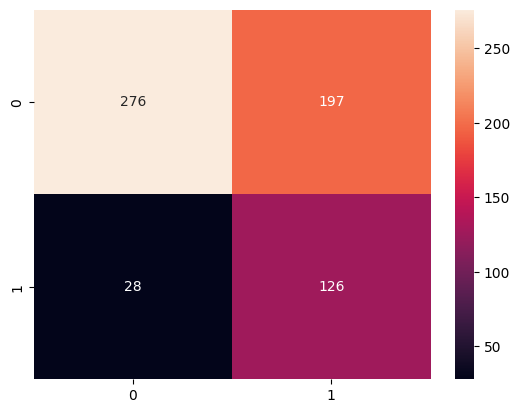

In [ ]:
#plotar matriz de confusão
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_data['EVOLUCAO'], predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()
# salvar matriz como pkl
import pickle
with open('/content/drive/My Drive/dataset_mc853/matriz_confusao.pkl', 'wb') as f:
    pickle.dump(cm, f)

In [ ]:
test_data['EVOLUCAO'].value_counts()

,count
EVOLUCAO,
0,473
1,154


In [ ]:
# escolhemos a coluna sexo pra medir o fairness

# selecionar instancias de mulheres
df_test_female = test_data[test_data['CS_SEXO'] == 0]

# selecionar instancias de homens
df_test_male = test_data[test_data['CS_SEXO'] == 1]

# testar modelo nas instancias femininas
y_pred_female = best_model.predict(df_test_female.drop(['EVOLUCAO'], axis=1))

# testar modelo nas instancias masculinas
y_pred_male = best_model.predict(df_test_male.drop(['EVOLUCAO'], axis=1))

# checar recall para mulheres e recall para homens
recall_score_female = recall_score(df_test_female['EVOLUCAO'], y_pred_female)
recall_score_male = recall_score(df_test_male['EVOLUCAO'], y_pred_male)
precision_score_female = precision_score(df_test_female['EVOLUCAO'], y_pred_female)
precision_score_male = precision_score(df_test_male['EVOLUCAO'], y_pred_male)

# printar recall
print('Recall para mulheres: ', recall_score_female)
print('Recall para homens: ', recall_score_male)
print('Precision para mulheres: ', precision_score_female)
print('Precision para homens: ', precision_score_male)

Recall para mulheres:  0.8076923076923077
Recall para homens:  0.8203125
Precision para mulheres:  0.29577464788732394
Precision para homens:  0.4166666666666667


In [ ]:
#salvar modelo
import pickle

with open('/content/drive/My Drive/dataset_mc853/best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [ ]:
test_data["CS_SEXO"].value_counts()

,count
CS_SEXO,
1,477
0,150


In [ ]:
#salvar bases de treino e teste
train_data.to_csv('/content/drive/My Drive/dataset_mc853/train_data.csv')
test_data.to_csv('/content/drive/My Drive/dataset_mc853/test_data.csv')